### Student Information
Name: 陳柏諭

Student ID: 110034012

GitHub ID: jc533

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [23]:
### Begin Assignment Here
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# # If you get "ModuleNotFoundError: No module named 'PAMI'"
# # run the following in a new Jupyter cell:
# # !pip3 install PAMI
import PAMI
import umap
%load_ext autoreload
%autoreload 2
import sys
print(sys.executable) # c:\<your path to the project directory>\.venv\Scripts\python.exe
print(sys.version) #3.11.0

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/supercat/pocket-space/class/datamining/DM2025-Lab1-Exercise/.venv/bin/python
3.11.0 | packaged by conda-forge | (main, Jan 14 2023, 12:27:40) [GCC 11.3.0]


[nltk_data] Downloading package punkt to /home/supercat/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [24]:
df = pd.read_csv('newdataset/Reddit-stock-sentiment.csv')
df = df[["title","upvote_ratio","text","sentiment","label","subjectivity"]] # keep only column that I think is useful
df

,title,upvote_ratio,text,sentiment,label,subjectivity
0,Retardation is on the menu boys! WSB is so back,NaN,Calls on retards,-1.0,-1.0,1.000000
1,Retail giant TARGET has now declined for 10 co...,NaN,Stunt as in like why did they even make a big ...,1.0,0.0,0.177778
2,How do you feel about a sitting president maki...,NaN,Seeing lots of red in the ticker.,0.0,0.0,0.000000
3,Who knows more? $VMAR,0.98,Vision Marine Technologies Inc. is rewriting t...,1.0,1.0,0.646970
4,The Trump administration is begging Xi Jinping...,NaN,He didn’t say thank you.,0.0,-1.0,0.000000
...,...,...,...,...,...,...
842,$MRIN Marin Software killed it today. Hope som...,NaN,Invest now it is going to shoot up tomorrow,0.0,1.0,0.000000
843,$ U.S. dollar value (crashing),NaN,Where can I read this?,0.0,0.0,0.000000
844,Analyst Recommendations,1.00,"Upgrades, Downgrades\n\n [Stock Analyst Recomm...",0.0,0.0,0.000000
845,Weekend Discussion Thread for the Weekend of A...,NaN,i sold my puts so i expect cheeto to declare w...,0.0,-1.0,0.000000


In [25]:
df.head()

,title,upvote_ratio,text,sentiment,label,subjectivity
0,Retardation is on the menu boys! WSB is so back,NaN,Calls on retards,-1.0,-1.0,1.000000
1,Retail giant TARGET has now declined for 10 co...,NaN,Stunt as in like why did they even make a big ...,1.0,0.0,0.177778
2,How do you feel about a sitting president maki...,NaN,Seeing lots of red in the ticker.,0.0,0.0,0.000000
3,Who knows more? $VMAR,0.98,Vision Marine Technologies Inc. is rewriting t...,1.0,1.0,0.646970
4,The Trump administration is begging Xi Jinping...,NaN,He didn’t say thank you.,0.0,-1.0,0.000000


# Exercise 1

In [26]:
for i in range(3):
    print("example ",i+1)
    print(df.text[i])

example  1
Calls on retards
example  2
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
example  3
Seeing lots of red in the ticker.


# Exercise 2

In [27]:
df.loc[lambda df: df["label"]==1][:10]

,title,upvote_ratio,text,sentiment,label,subjectivity
3,Who knows more? $VMAR,0.98,Vision Marine Technologies Inc. is rewriting t...,1.0,1.0,0.646970
8,"It's fucking awful seeing the ""Silver"" misinfo...",NaN,Am I the only one seeing the cup & handle brea...,1.0,1.0,0.491818
9,Any cheap stocks under $10?,NaN,HLGN is $10. Hurry and catch it now before it ...,0.0,1.0,0.000000
34,"It's fucking awful seeing the ""Silver"" misinfo...",NaN,So they went from saying redditors are bad for...,-1.0,1.0,0.666667
38,Someone post the hotline please.,NaN,"Hey our net worth match now, we can be friends!",1.0,1.0,0.050000
39,Formerly Stable US Treasuries Are Trading Like...,NaN,Other countries probably will go through a rec...,1.0,1.0,0.517857
42,"It's fucking awful seeing the ""Silver"" misinfo...",NaN,So they went from saying redditors are bad for...,-1.0,1.0,0.666667
61,Retail giant TARGET has now declined for 10 co...,NaN,"if best buy can survive, target will survive.",1.0,1.0,0.300000
65,"It's fucking awful seeing the ""Silver"" misinfo...",NaN,I bought into silver companies and made a nice...,1.0,1.0,1.000000
74,Anyone following $MEGA.CN??,NaN,"This is a massive acquisition for them, adding...",0.0,1.0,1.000000


# Exercise 3(skip)

# Exercise 4

In [28]:
import helpers.data_mining_helpers as dmh
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 1)
1      (The amoung of missing records is: , 1)
2      (The amoung of missing records is: , 1)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 1)
                        ...                   
842    (The amoung of missing records is: , 1)
843    (The amoung of missing records is: , 1)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 1)
846    (The amoung of missing records is: , 1)
Length: 847, dtype: object

In [29]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,title,upvote_ratio,text,sentiment,label,subjectivity
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,783,0,0,0,0


In [30]:
len(df)

847

In [31]:
df.drop(columns=["upvote_ratio"],inplace=True)
len(df)

847

# Exercise 5

In [33]:
df.isnull().sum()

title           0
text            0
sentiment       0
label           0
subjectivity    0
dtype: int64

In [34]:
sum(df.duplicated())

23

In [36]:
df.drop_duplicates(keep=False, inplace=True)
len(df)

813

# Exercise 6

In [37]:
df_sample = df.sample(n=400)
display(df.tail())
display(df_sample.tail())
# Apprently the order of the sequence is different
# And the random state is different every time we run the code sonce the seed is not fiexed
# The original index values are preserved.
# The length is decreased to 400.

,title,text,sentiment,label,subjectivity
841,The Trump administration is begging Xi Jinping...,So countries “begging to stop the tariffs” and...,0.0,1.0,0.0
842,$MRIN Marin Software killed it today. Hope som...,Invest now it is going to shoot up tomorrow,0.0,1.0,0.0
843,$ U.S. dollar value (crashing),Where can I read this?,0.0,0.0,0.0
845,Weekend Discussion Thread for the Weekend of A...,i sold my puts so i expect cheeto to declare w...,0.0,-1.0,0.0
846,Someone post the hotline please.,![img](emote|t5_2th52|31224),0.0,0.0,0.0


,title,text,sentiment,label,subjectivity
612,Data Shows US Allies—Not China—Dumping Treasuries,The Chinese likely hold these bonds in many di...,1.0,1.0,0.547756
466,What do you guys think of my portfolio!,Ha ha ha nothing much my number of shares are ...,-1.0,0.0,0.325000
328,Data Shows US Allies—Not China—Dumping Treasuries,And Trump just handed them this situation on a...,1.0,-1.0,0.900000
171,Weekend Discussion Thread for the Weekend of A...,Mango's insider trading club: Let's nuke it fr...,1.0,0.0,0.888889
617,$ U.S. dollar value (crashing),So this whole time he was just seeking validat...,1.0,-1.0,0.840000


In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

# Exercise 7

<Axes: title={'center': 'sentiment distribution'}, xlabel='sentiment'>

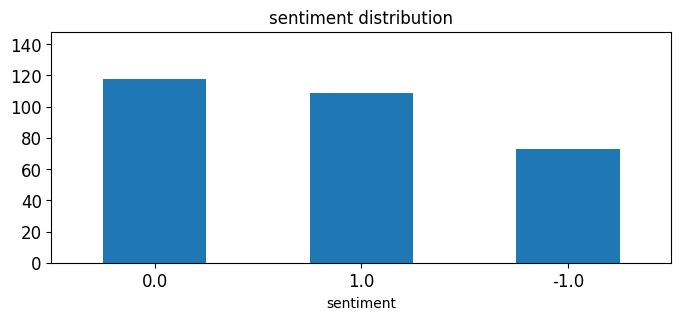

In [40]:
# Answer here
df_sample.sentiment.value_counts().plot(kind="bar",
                                           title="sentiment distribution",
                                           ylim=[0,df_sample.sentiment.value_counts().max()+30],
                                           rot=0, fontsize=12, figsize=(8,3))

# Exercise 8

<Axes: title={'center': 'sentiment distribution'}, xlabel='sentiment'>

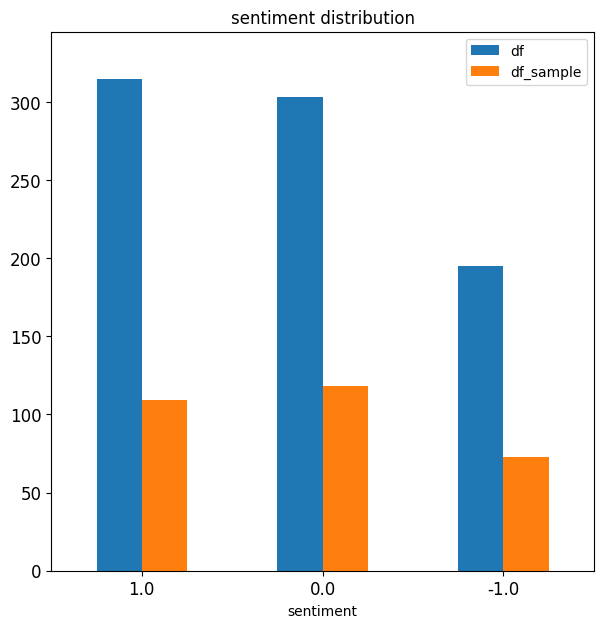

In [43]:
# Answer here
combine_df = pd.concat([df.sentiment.value_counts(),df_sample.sentiment.value_counts()],
                       keys=["df", "df_sample"],axis=1)
combine_df.plot(kind="bar",
                    title="sentiment distribution",
                    ylim=[0,combine_df.max().max()+30],
                    rot=0, fontsize=12, figsize=(7,7))

# Exercise 9

In [44]:
df['unigrams'] = df['text'].apply(lambda x: dmh.tokenize_text(x))
df.head()["unigrams"]

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
4                 [He, didn, ’, t, say, thank, you, .]
Name: unigrams, dtype: object

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.text) #learn the vocabulary and return document-term matrix
print(df_counts[0])
analyze = count_vect.build_analyzer()

  (np.int32(0), np.int32(689))	1
  (np.int32(0), np.int32(2682))	1
  (np.int32(0), np.int32(3220))	1


In [46]:
analyze(df.text[0])

['calls', 'on', 'retards']

# Exercise 10(skip)

# Exercise 11

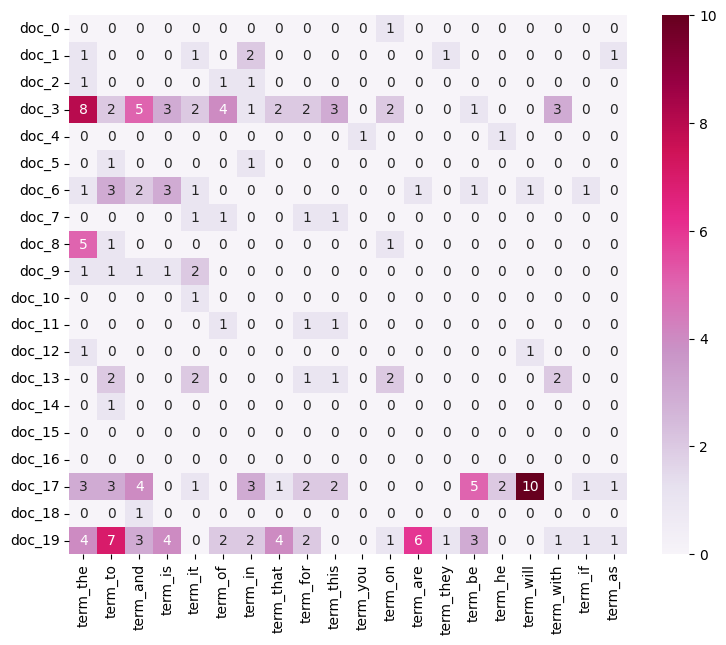

In [47]:
import seaborn as sns
term_freq = np.asarray(df_counts.sum(axis=0)).ravel()
top_idx = term_freq.argsort()[::-1][:20] # select top 20 frequency word
p_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[top_idx]]
p_y = ["doc_" + str(i) for i in list(df.index)[:20]]
p_z = df_counts[:20, :][:, top_idx].toarray()
df_todraw = pd.DataFrame(p_z, columns=p_x, index=p_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",annot=True)

# Exercise 12

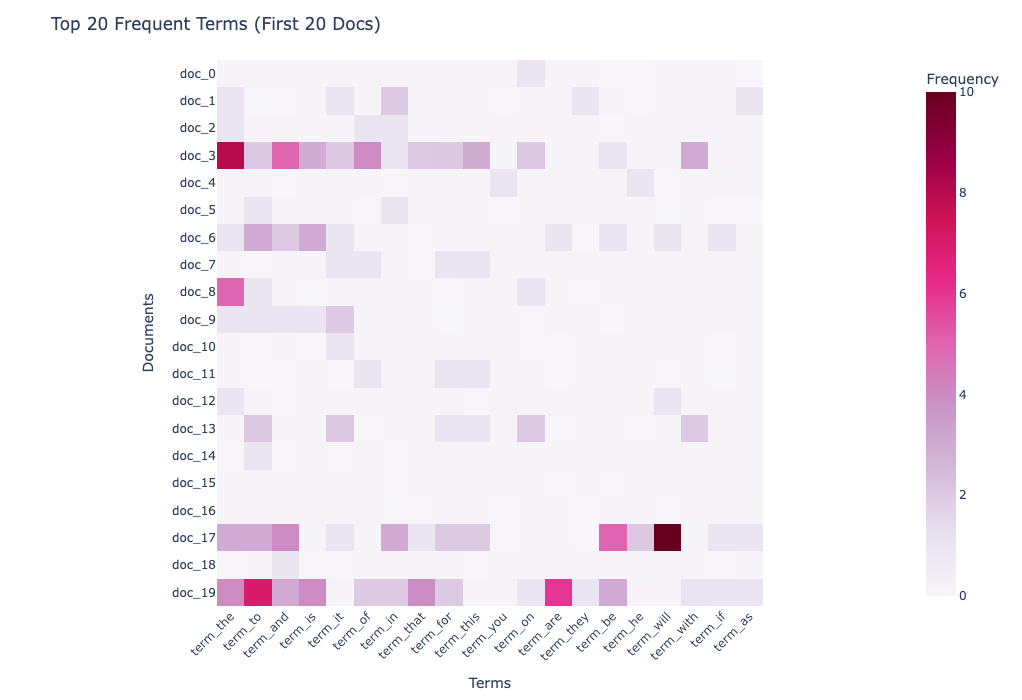

In [49]:
# Answer here
import plotly.express as px

term_freq = np.asarray(df_counts.sum(axis=0)).ravel()
top_idx = term_freq.argsort()[::-1][:20]  # select top 20 frequency word

p_x = ["term_" + str(i) for i in count_vect.get_feature_names_out()[top_idx]]
p_y = ["doc_" + str(i) for i in list(df.index)[:20]]
p_z = df_counts[:20, :][:, top_idx].toarray()

df_todraw = pd.DataFrame(p_z, columns=p_x, index=p_y)
fig = px.imshow(
    df_todraw,
    labels=dict(x="Terms", y="Documents", color="Frequency"),
    x=p_x,
    y=p_y,
    color_continuous_scale="PuRd",
)

fig.update_layout(
    title="Top 20 Frequent Terms (First 20 Docs)",
    xaxis_tickangle=-45,
    width=900,
    height=700,
)

fig.show()

# Exercise 13

/tmp/ipykernel_23553/2451575095.py:15: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



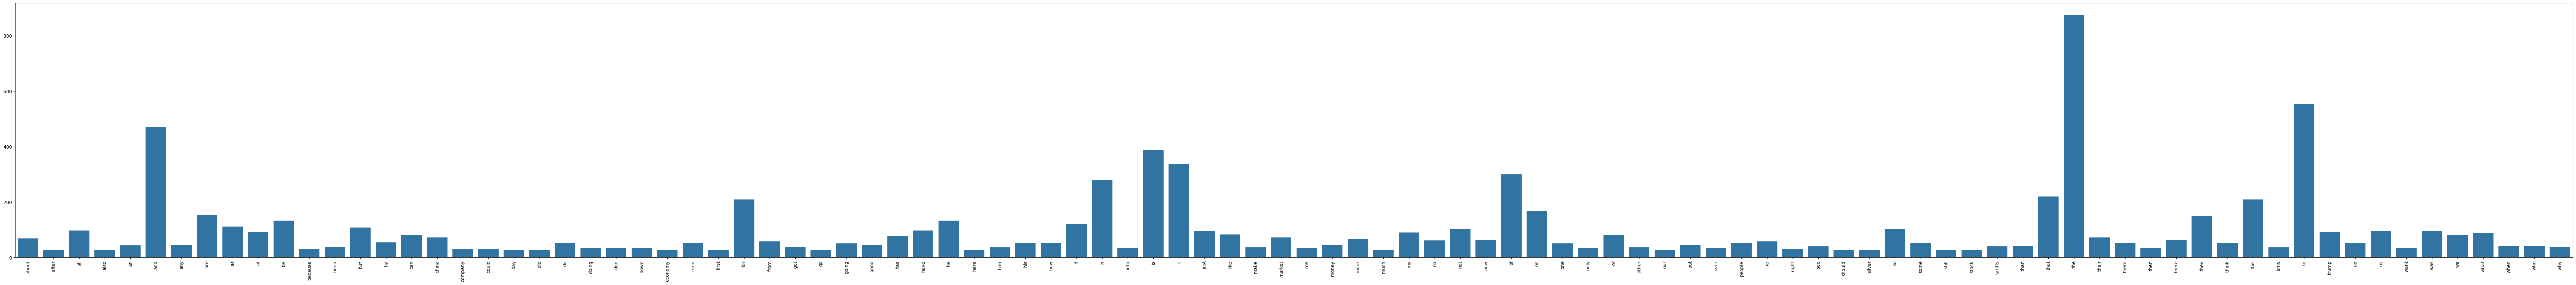

In [51]:
# keep only 100 frequency higher than 25
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

threshold = 25
idx = np.where(term_frequencies >= threshold)[0]
kept_terms = count_vect.get_feature_names_out()[idx]
kept_freqs = term_frequencies[idx]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=kept_terms[:100], 
            y=kept_freqs[:100])
g.set_xticklabels(kept_terms[:100], rotation = 90);


# Exercise 14

/tmp/ipykernel_23553/1944787921.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



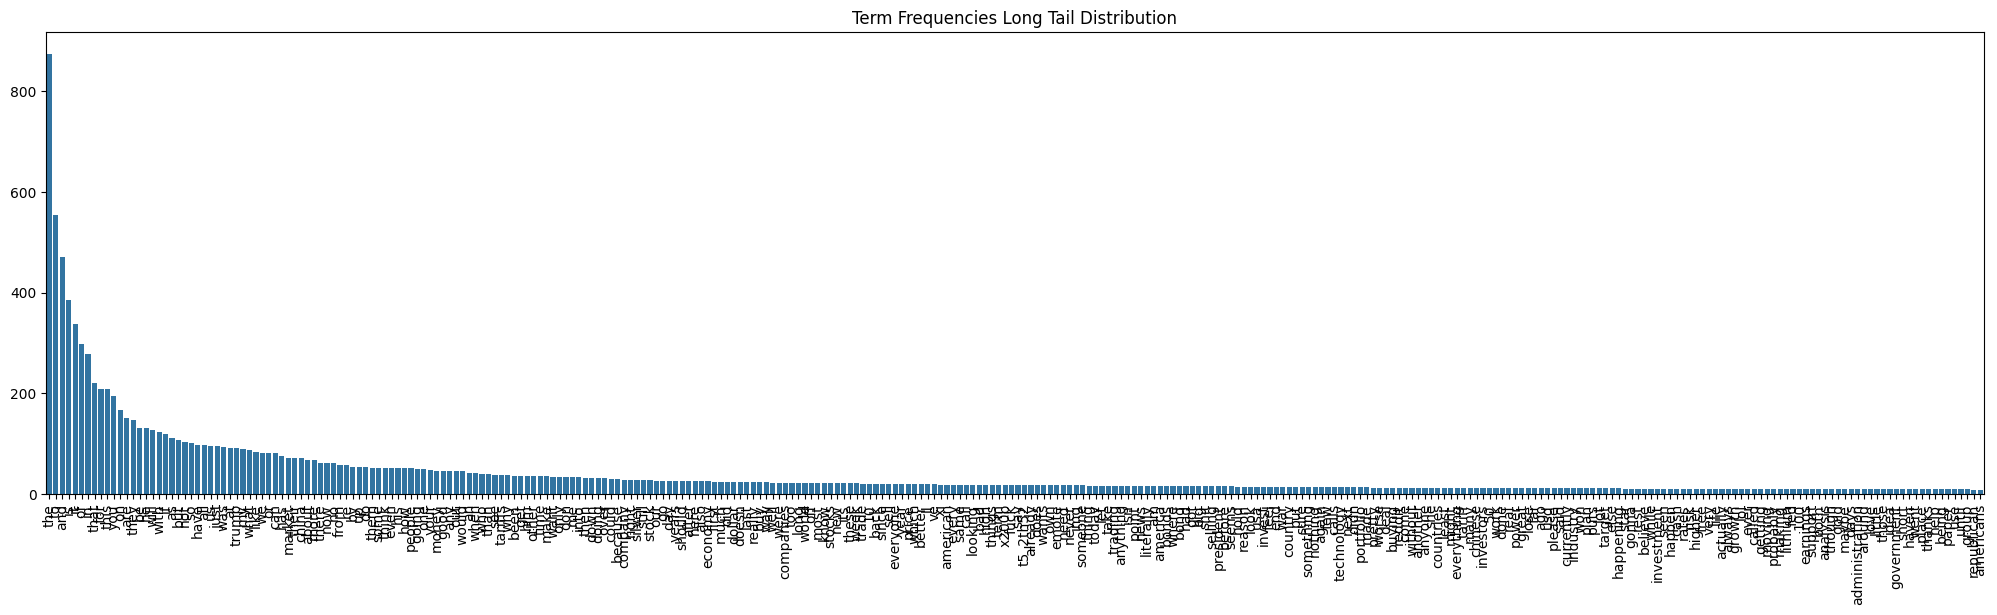

In [52]:
sorted_idx = np.argsort(term_frequencies)[::-1]
kept_terms = count_vect.get_feature_names_out()[sorted_idx]
kept_freqs = term_frequencies[sorted_idx]

plt.subplots(figsize=(25, 6))
g = sns.barplot(x=kept_terms[:300], y=kept_freqs[:300])
g.set_xticklabels(kept_terms[:300], rotation=90)
plt.title("Term Frequencies Long Tail Distribution")
plt.show()

# Exercise 15

/tmp/ipykernel_23553/4130362313.py:11: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



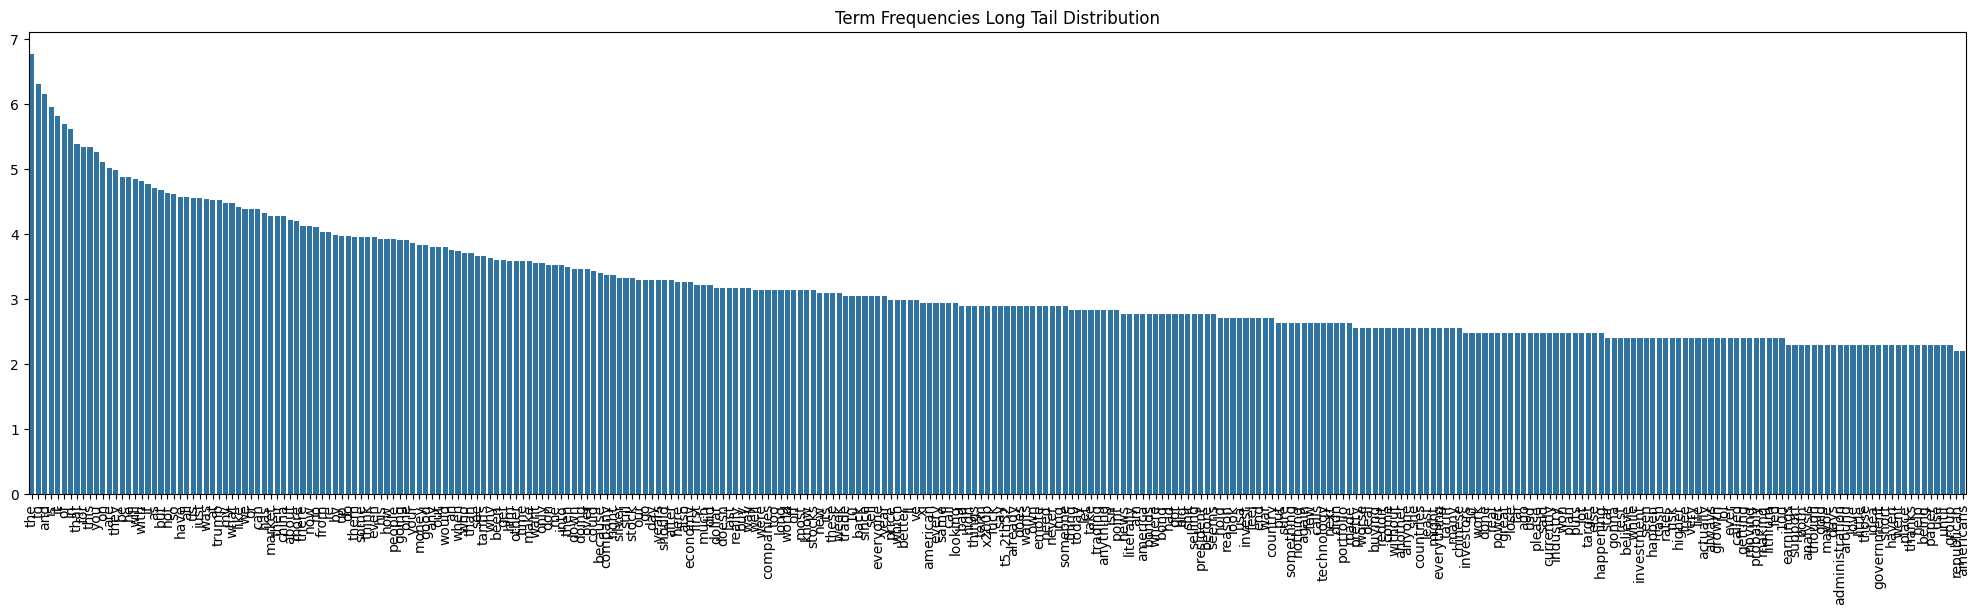

In [54]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
# convert term_frequencies_log to np array
term_frequencies_log = np.array(term_frequencies_log)
sorted_idx = np.argsort(term_frequencies_log)[::-1]
kept_terms = count_vect.get_feature_names_out()[sorted_idx]
kept_freqs = term_frequencies_log[sorted_idx]

plt.subplots(figsize=(25, 6))
g = sns.barplot(x=kept_terms[:300], y=kept_freqs[:300])
g.set_xticklabels(kept_terms[:300], rotation=90)
plt.title("Term Frequencies Long Tail Distribution")
plt.show()
# the decrease trend is slower than exercise 14

# part 3 data visualizations

In [57]:
df

,title,text,sentiment,label,subjectivity,unigrams
0,Retardation is on the menu boys! WSB is so back,Calls on retards,-1.0,-1.0,1.000000,"[Calls, on, retards]"
1,Retail giant TARGET has now declined for 10 co...,Stunt as in like why did they even make a big ...,1.0,0.0,0.177778,"[Stunt, as, in, like, why, did, they, even, ma..."
2,How do you feel about a sitting president maki...,Seeing lots of red in the ticker.,0.0,0.0,0.000000,"[Seeing, lots, of, red, in, the, ticker, .]"
3,Who knows more? $VMAR,Vision Marine Technologies Inc. is rewriting t...,1.0,1.0,0.646970,"[Vision, Marine, Technologies, Inc., is, rewri..."
4,The Trump administration is begging Xi Jinping...,He didn’t say thank you.,0.0,-1.0,0.000000,"[He, didn, ’, t, say, thank, you, .]"
...,...,...,...,...,...,...
841,The Trump administration is begging Xi Jinping...,So countries “begging to stop the tariffs” and...,0.0,1.0,0.000000,"[So, countries, “, begging, to, stop, the, tar..."
842,$MRIN Marin Software killed it today. Hope som...,Invest now it is going to shoot up tomorrow,0.0,1.0,0.000000,"[Invest, now, it, is, going, to, shoot, up, to..."
843,$ U.S. dollar value (crashing),Where can I read this?,0.0,0.0,0.000000,"[Where, can, I, read, this, ?]"
845,Weekend Discussion Thread for the Weekend of A...,i sold my puts so i expect cheeto to declare w...,0.0,-1.0,0.000000,"[i, sold, my, puts, so, i, expect, cheeto, to,..."


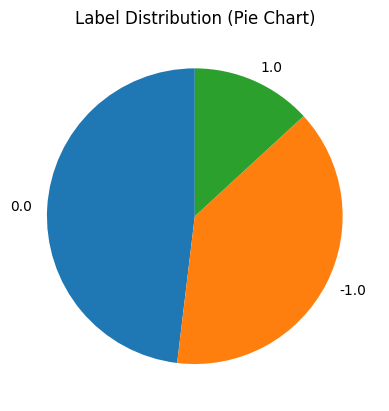

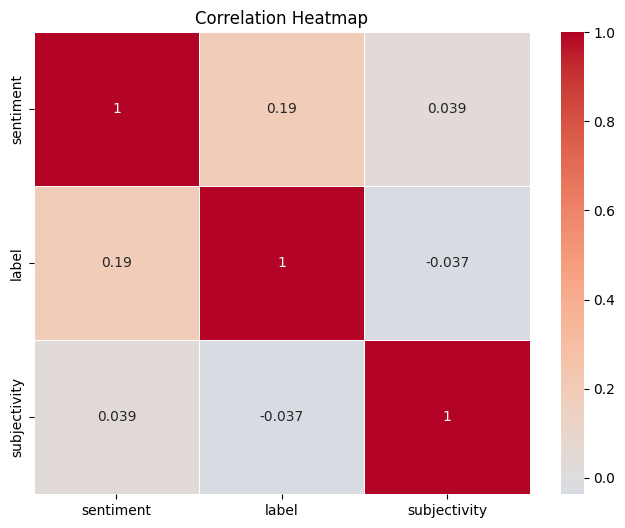

In [62]:
# Answer here
label_counts = df['label'].value_counts()
plt.pie(label_counts,
        labels=label_counts.index,
        startangle=90)
plt.title("Label Distribution (Pie Chart)")
plt.show()

# Compute the correlation matrix
corr = df.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()



# Phase 2

In [ ]:
### Begin Assignment Here